<a href="https://colab.research.google.com/github/te19oishi/colab/blob/main/fourier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sfft
import IPython

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*800*t) + np.sin(2*np.pi*500*t)
IPython.display.Audio(s,rate=fs)

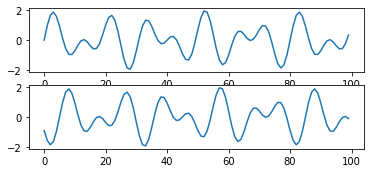

In [ ]:
rg=np.arange(0,100)
plt.subplot(3,1,1); plt.plot(s[rg])
sd=np.roll(s,5)
plt.subplot(3,1,2); plt.plot(sd[rg])
IPython.display.Audio(sd,rate=fs)

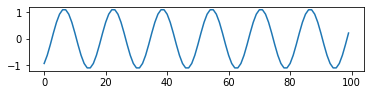

In [ ]:
ssd=s+sd
plt.subplot(3,1,3); plt.plot(ssd[rg])
IPython.display.Audio(ssd,rate=fs)

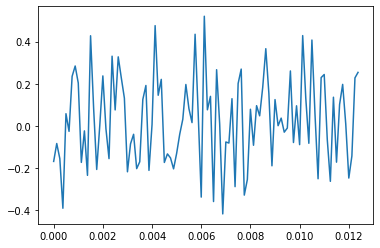

In [ ]:
r=np.random.standard_normal(t.shape)
r=0.8*r/np.max(np.abs(r))
n=np.arange(0,100)
plt.plot(t[n],r[n])
plt.show()
IPython.display.Audio(r,rate=fs)
IPython.display.Audio(r,rate=fs)


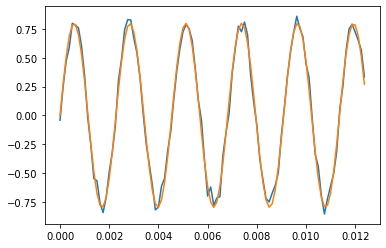

In [ ]:
s=np.sin(2*np.pi*440*t)
sn=0.8*s+0.25*r
n=np.arange(0,100)
plt.plot(t[n],sn[n],t[n],0.8*s[n])
plt.show()
IPython.display.Audio(sn,rate=fs)

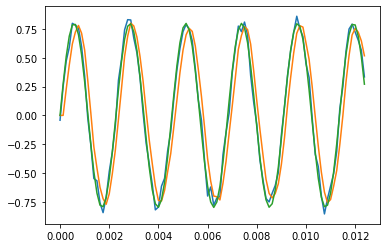

In [ ]:
y=np.zeros(sn.shape)
pn=3
for k in np.arange(pn-1,t.shape[0]):
  y[k]=np.mean(sn[k-pn+1:k+1])

plt.plot(t[n],sn[n],t[n],y[n],t[n],0.8*s[n])
plt.show()
IPython.display.Audio(sn,rate=fs)

In [ ]:
IPython.display.Audio(y,rate=fs)

In [ ]:
IPython.display.Audio(s,rate=fs)

In [ ]:
h=np.ones((3,))/3
h

array([0.33333333, 0.33333333, 0.33333333])

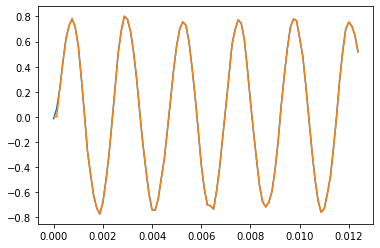

In [ ]:
y2=np.convolve(h,sn)
plt.plot(t[n],y2[n],t[n],y[n])
plt.show()

In [ ]:
imp=np.zeros((1024,))
imp[0]=1
imp

array([1., 0., 0., ..., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


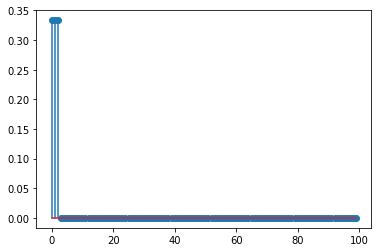

In [ ]:
h=np.ones((3,))/3
h_imp=np.convolve(h,imp)
plt.stem(h_imp[:100])
plt.show()

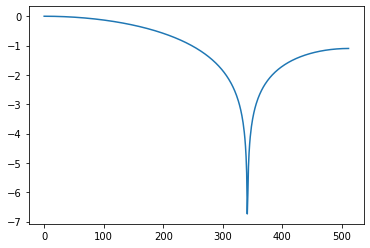

In [ ]:
S_imp=sfft.fft(h_imp,1024)
plt.plot(np.log(np.abs(S_imp[:512])))

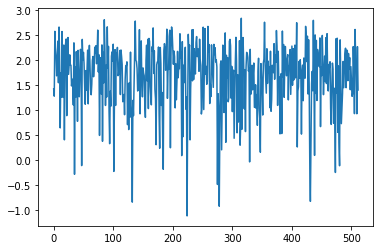

In [ ]:
S_imp=sfft.fft(h_imp,1024)
wn=np.random.standard_normal(S_imp.shape)
wn=0.8*wn/np.max(np.abs(wn))
WN=sfft.fft(wn)
plt.plot(np.log(np.abs(WN[:512])))

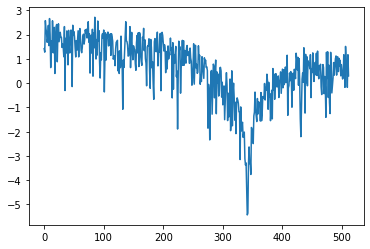

In [ ]:
WN_filtered=WN*S_imp
plt.plot(np.log(np.abs(WN_filtered[:512])))

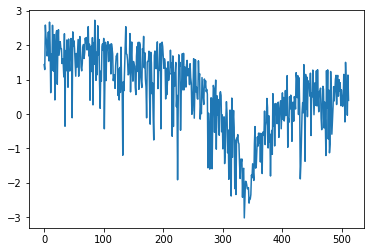

In [ ]:
wn_conv=np.convolve(h,wn)
S_wn_conv=sfft.fft(wn_conv,1024)
plt.plot(np.log(np.abs(S_wn_conv[:512])))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


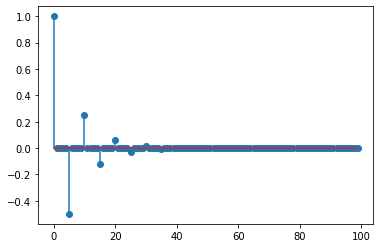

In [ ]:
a=np.array([1,0,0,0,0,0.5])
b=np.array([1])
ir_iir = ss.lfilter(b,a,imp)
plt.stem(ir_iir[:100])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<function matplotlib.pyplot.show>

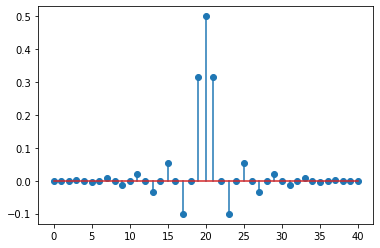

In [ ]:
h_lp2k=ss.firwin(41,0.5)
plt.stem(h_lp2k)
plt.show

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*440*t)
r=np.sin(2*np.pi*3000*t)       # 3kHzのノイズを作る
sn=0.8*s+0.25*r                # 440Hzに3kHzのノイズを入れsnを作る
h_lp2k=ss.firwin(41,0.5)       # 2kHz 以上の成分を通さないLPF h_lp2kを作る
snf= ss.lfilter(h_lp2k,1,sn)  # snに作ったLPFをかける
IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*440*t)
r=np.sin(2*np.pi*3000*t)       # 3kHzのノイズを作る
sn=0.8*s+0.25*r                # 440Hzに3kHzのノイズを入れsnを作る
h_lp2k=ss.firwin(41,0.5)       # 2kHz 以上の成分を通さないLPF h_lp2kを作る
snf= ss.lfilter(h_lp2k,1,sn)  # snに作ったLPFをかける
#IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*440*t)
r=np.sin(2*np.pi*3000*t)       # 3kHzのノイズを作る
sn=0.8*s+0.25*r                # 440Hzに3kHzのノイズを入れsnを作る
h_lp2k=ss.firwin(41,0.5)       # 2kHz 以上の成分を通さないLPF h_lp2kを作る
snf= ss.lfilter(h_lp2k,1,sn)  # snに作ったLPFをかける
#IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる

In [ ]:
b,a=ss.butter(11,0.5)
snb=ss.lfilter(b,a,sn)

IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる

In [ ]:
b,a=ss.butter(11,0.5)
snb=ss.lfilter(b,a,sn)

#IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる

In [ ]:
b,a=ss.butter(11,0.5)
snb=ss.lfilter(b,a,sn)

#IPython.display.Audio(s,rate=fs)  # sとsnとsnfを聞き比べる
#IPython.display.Audio(sn,rate=fs)  # sとsnとsnfを聞き比べる
IPython.display.Audio(snf,rate=fs) # sとsnとsnfを聞き比べる